# Weather

Open Meteo is a free and open-source weather data API that provides access to real-time and historical weather data for locations around the world. It offers a range of weather data, including temperature, humidity, wind speed, and precipitation.

In [1]:
import requests
import pandas as pd

# Ask user for latitude and longitude (e.g., Sydney is -33.891228, 151.19585)
latitude = input("Enter latitude: ")
longitude = input("Enter longitude: ")

# We construct a URL that is specific to the latitude and longitude the user inputted.
url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true&hourly=temperature_2m,relativehumidity_2m,windspeed_10m'
response = requests.get(url)    # We can then query this URL using a GET request
data = response.json()          # Format the response to json

current_weather = data['current_weather']
print(f'Weather information at {latitude},{longitude}')
pd.DataFrame.from_dict(current_weather, orient='index', columns=['values'])

Weather information at -33.9,151.2


,values
time,2023-10-16T02:00
interval,900
temperature,24.7
windspeed,26.7
winddirection,267
is_day,1
weathercode,2


# yfinance

yfinance is a Python library that allows you to download financial data from Yahoo Finance. It provides a simple and convenient way to access historical stock prices, dividend data, and other financial data for publicly traded companies. With yfinance, you can easily download data for multiple stocks at once and perform analysis on the data using popular Python libraries like Pandas and Matplotlib.

In [4]:
import yfinance as yf
tesla = yf.download(
    tickers = 'TSLA', 
    start='2022-08-03', 
    end='2023-08-10'
    )
tesla

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-03,305.000000,309.549988,301.149994,307.396667,307.396667,80091000
2022-08-04,311.000000,313.606659,305.000000,308.633331,308.633331,72256200
2022-08-05,302.670013,304.606659,285.543335,288.170013,288.170013,113172900
2022-08-08,295.000000,305.200012,289.086670,290.423340,290.423340,98994000
2022-08-09,290.293335,292.396667,279.353333,283.333344,283.333344,86244600
...,...,...,...,...,...,...
2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600
2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997,111097900


<Axes: xlabel='Date'>

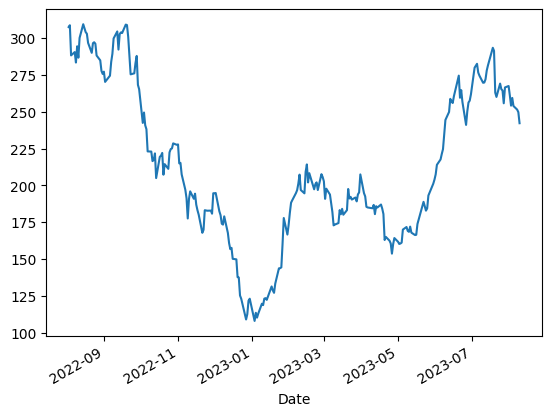

In [6]:
tesla['Adj Close'].plot()

# News API

In [9]:
import requests

API_KEY = '624a9a3e85594ae99cd62b5379d12538' # FD's key
start = '2023-10-12'
end = '2023-10-12'
topic = 'apple'

# set response to the get request to the newsAPI asking for everything on the subjects of Apple
response = requests.get(f"https://newsapi.org/v2/everything?q={topic}&from={start}&to={end}&sortBy=popularity&apiKey={API_KEY}",timeout=10)

# print each title of the articles
for article in response.json()['articles']:
    print(article['title'])

# for each article in the response, use textblob to get the sentiment of the article
from textblob import TextBlob
for article in response.json()['articles']:
    print(TextBlob(article['title']).sentiment)


The 26 best Amazon Prime Day deals you can still shop for today
Infinite Machine P1 Electric Scooter: Specs, Release Date, Features
Microsoft Surface Laptop Go 3 review: why does this exist?
For All Mankind's Season 4 Trailer Introduces a New Space Race
Starlink Says It's Bringing Cell Service to Remote Regions Starting Next Year
Apple AirTags stalking led to ruin and murders, lawsuit says
Ubuntu 23.10 is a Minotaur that moves faster and takes up less space
Google has new nifty tools for users who are concerned about their privacy
The Tensor G3 in the Pixel 8 is the best phone chip today
Apple Settles 7-Year Wi-Fi Chip Patent Dispute With Caltech
Bose QuietComfort Ultra Earbuds Review: Slightly Better Than Last Year's Model - CNET
Remember the Lower-Cost Apple Watch Series 1? It's Vintage Now
Apple Shares Checklist With Important Tips for Buying a Used iPhone
The Best Apple Deals You Can Still Get From Amazon's October Prime Day
Apple's First M3 MacBooks Coming Next Year, Claims Shipme

# Pandas read_html() function

Pandas provides a `read_html()` function that allows you to extract tables from HTML web pages and convert them into Pandas DataFrames. This function is particularly useful for web scraping tasks where you need to extract data from HTML tables on a web page. The `read_html()` function can automatically detect and parse HTML tables from a web page and return them as a list of DataFrames. You can then manipulate the DataFrames using Pandas to perform further analysis or export the data to other formats.

In [10]:
# For example, if we want to get a list of the tickers in the Nasdaq 100, 
# we can use the following code:
nasdaq = 'https://en.wikipedia.org/wiki/Nasdaq-100#Components'
data_table = pd.read_html(nasdaq)

# print out information about the data_table
print(f'Type: {type(data_table)}')
print(f'Length: {len(data_table)}')
print(f'Dimensions: {data_table[0].shape}')

data_table

Type: <class 'list'>
Length: 17
Dimensions: (11, 2)


[                                     0                                       1
 0   Nasdaq-100 Index from 1985 to 2015      Nasdaq-100 Index from 1985 to 2015
 1                           Foundation          January 31, 1985; 38 years ago
 2                             Operator                            Nasdaq, Inc.
 3                            Exchanges                                  Nasdaq
 4                       Trading symbol                                    ^NDX
 5                         Constituents                                     101
 6                                 Type                               Large-cap
 7                           Market cap  US$16.9 trillion (as of April 2022)[1]
 8                     Weighting method      Free-float capitalization-weighted
 9                      Related indices                    Nasdaq Financial-100
 10                             Website                   nasdaq.com/nasdaq-100,
    Category  All-Time Highs[9]        